0.5943741321728595


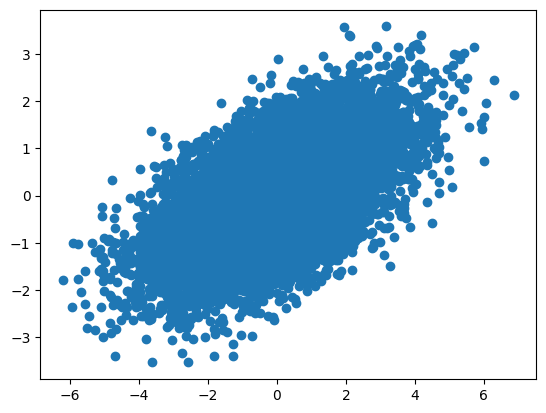

In [ ]:
# Python code to compute the correlation coefficient
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
x = stats.multivariate_normal.rvs([0,0], [[3,1],[1,1]], 10000)
plt.figure(); plt.scatter(x[:,0],x[:,1])
rho,_ = stats.pearsonr(x[:,0],x[:,1])
print(rho)

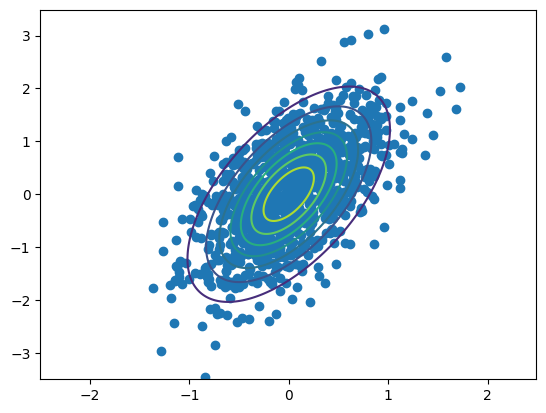

In [ ]:
# Python code: Overlay random numbers with the Gaussian contour.
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

X = stats.multivariate_normal.rvs([0,0],[[0.25,0.3],[0.3,1.0]],1000)
x1 = np.arange(-2.5, 2.5, 0.01)
x2 = np.arange(-3.5, 3.5, 0.01)
X1, X2 = np.meshgrid(x1,x2)
Xpos = np.empty(X1.shape + (2,))
Xpos[:,:,0] = X1
Xpos[:,:,1] = X2

F = stats.multivariate_normal.pdf(Xpos,[0,0],[[0.25,0.3],[0.3,1.0]])

plt.scatter(X[:,0],X[:,1])
plt.contour(x1,x2,F)

In [ ]:
# Author: Andreas Müller
#         Hanmin Qin <qinhanmin2005@sina.com>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# construct the dataset
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=100)

(array([13., 15.,  6., 12.,  7.,  8.,  9., 12.,  8., 10.]),
 array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162]),
 <BarContainer object of 10 artists>)

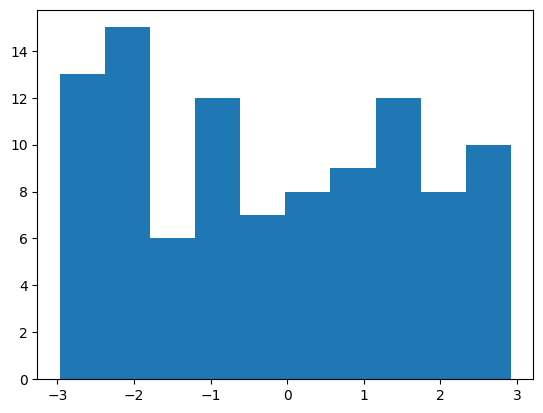

In [ ]:
plt.hist(X)

In [ ]:
y = np.sin(X) + rnd.normal(size=len(X)) / 3
X = X.reshape(-1, 1)

(array([ 7., 11., 13., 16., 12.,  5., 12., 13.,  8.,  3.]),
 array([-1.43764744, -1.13486992, -0.8320924 , -0.52931489, -0.22653737,
         0.07624015,  0.37901766,  0.68179518,  0.98457269,  1.28735021,
         1.59012773]),
 <BarContainer object of 10 artists>)

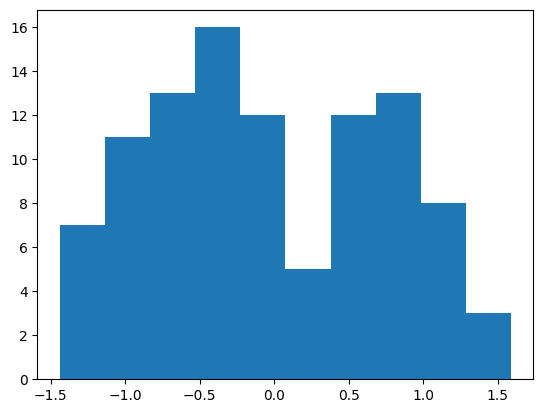

In [ ]:
plt.hist(np.sin(X)+ rnd.normal(size=len(X)) / 3)

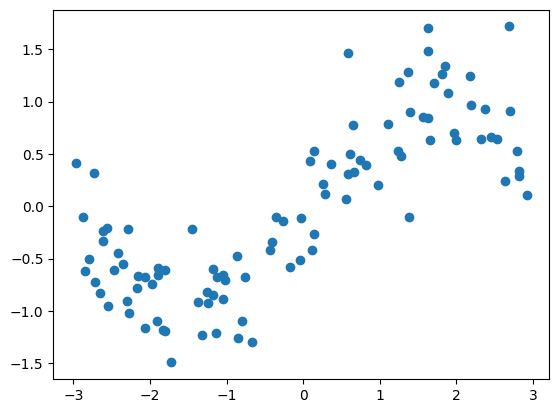

In [ ]:
plt.scatter(X, y)

In [ ]:
# transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10, encode="onehot")
X_binned = enc.fit_transform(X)


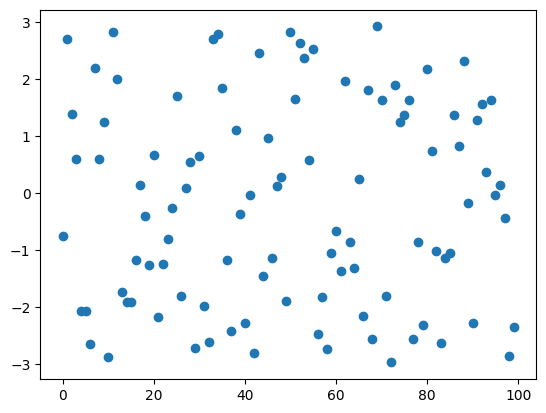

In [ ]:
plt.scatter(range(len(X)), X)

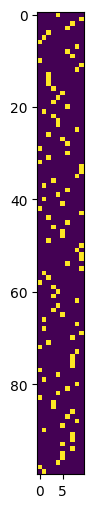

In [ ]:
plt.figure(figsize=(12, 6))
plt.imshow(X_binned.toarray())

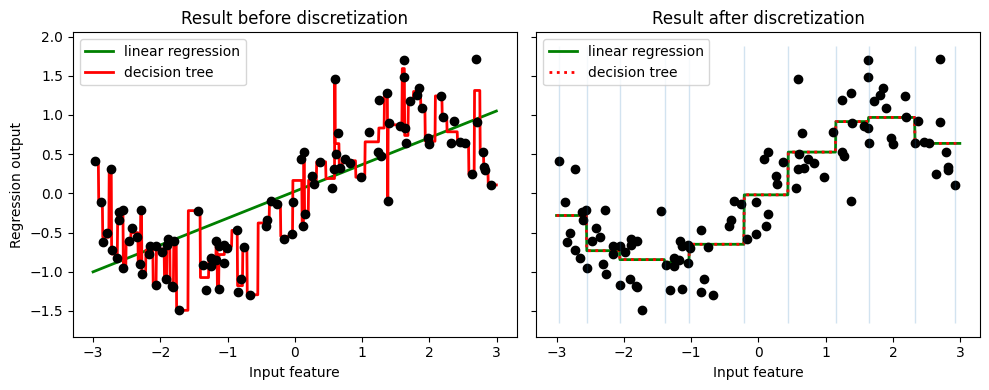

In [ ]:

# predict with original dataset
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = LinearRegression().fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color="green", label="linear regression")
reg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color="red", label="decision tree")
ax1.plot(X[:, 0], y, "o", c="k")
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")

# predict with transformed dataset
line_binned = enc.transform(line)
reg = LinearRegression().fit(X_binned, y)
ax2.plot(
    line,
    reg.predict(line_binned),
    linewidth=2,
    color="green",
    linestyle="-",
    label="linear regression",
)
reg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X_binned, y)
ax2.plot(
    line,
    reg.predict(line_binned),
    linewidth=2,
    color="red",
    linestyle=":",
    label="decision tree",
)
ax2.plot(X[:, 0], y, "o", c="k")
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=0.2)
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

from sklearn.datasets import load_iris

iris = load_iris()
target_names = iris.target_names
X, y = iris.data, iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

In [ ]:
random_state = np.random.RandomState(0)
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)

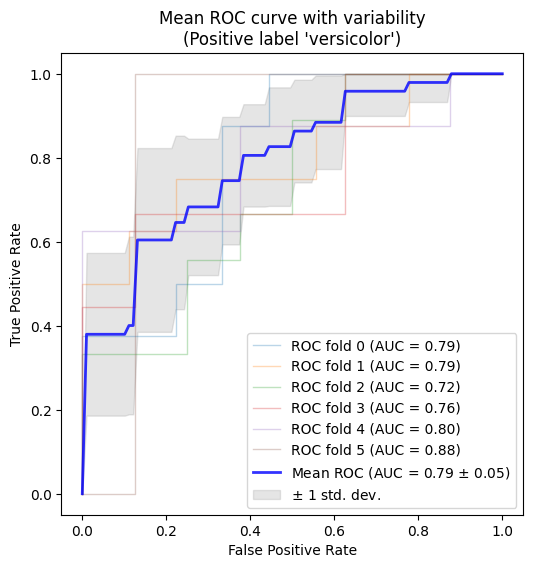

In [ ]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold

n_splits = 6
cv = StratifiedKFold(n_splits=n_splits)
classifier = svm.SVC(kernel="linear", probability=True, random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
        #plot_chance_level=(fold == n_splits - 1),
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability\n(Positive label '{target_names[1]}')",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()